# Exercício 1

Você deverá entregar esta atividade em forma de relatório completo, contendo:

<br>

- Código-fonte utilizado;

- Gráficos gerados com legenda e análise;

- Tabelas comparativas de erros e métodos;

- Discussão crítica dos resultados e da metodologia;

- Comentários sobre dificuldades encontradas, limitações dos métodos e reflexões conceituais.

<br>
 
O objetivo desta atividade é aplicar técnicas de integração numérica a uma função oscilatória com relevância física, discutindo aspectos matemáticos, computacionais e conceituais do problema.

 <br>
 
Considere a seguinte função:

 <br>

f(x)=sin(ωx) 

 <br>

com ω=2π, o que corresponde a uma oscilação completa no intervalo de x=0 a x=1. Essa função é comum na descrição de fenômenos oscilatórios, como movimentos harmônicos simples, vibrações mecânicas e correntes alternadas.

<br>

***

## a) Visualização e análise analítica
 
 <br>

- Plote o gráfico da função f(x)=sin(2πx) no intervalo de 0 a 1.

- Obtenha a função primitiva, se possível, ou utilize uma biblioteca simbólica para representá-la.

- Plote também a função primitiva no mesmo intervalo.

- Calcule analiticamente a integral definida de 0 a 1.

- Comente:

<br>

- - Qual é o valor esperado da área sob essa curva?

- - O resultado faz sentido no contexto físico?

- - O gráfico da função primitiva ajuda a interpretar esse comportamento?

 <br>

***

## b) Integração pela regra do trapézio
 
<br> 

- Calcule numericamente a integral definida entre 0 e 1 usando a regra do trapézio com n=10 subintervalos.

- Calcule o erro absoluto em relação ao valor analítico.

- Comente: o método apresentou dificuldades com a oscilação da função?

 <br> 

***

## c) Integração pela regra de Simpson
 
<br> 

- Aplique a regra de Simpson com n=10 subintervalos (lembrando que n deve ser par).

- Calcule o erro em relação ao valor exato.

- Compare com o resultado obtido com a regra do trapézio.

<br> 

***

## d) Aumento da resolução
 
<br>
 
- Repita os cálculos com n=100 e n=1000 subintervalos.

- Apresente um gráfico comparando os valores obtidos por cada método em função do número de subintervalos.

- Se desejar, apresente também os erros em escala logarítmica.

- Comente:

<br>

- - Qual método apresentou convergência mais rápida?

- - Algum dos métodos mostrou comportamento oscilante com o aumento de n?

<br> 

***

## e) Método adaptativo de Simpson
 
<br> 

- Implemente o método adaptativo de Simpson com precisão alvo ϵ=10−6, conforme as equações apresentadas na Seção 5.3 do material (equações 5.35 a 5.39).

- Comece com n=2 subintervalos e dobre até atingir a precisão requerida.

- Em cada passo, registre o número de subintervalos utilizados e a estimativa da integral.

- Comente: o método foi eficiente para essa função? O número de iterações foi adequado?

<br> 

***

## Parte reflexiva (obrigatória)
 
<br> 

- A função seno aparece em muitos sistemas físicos. Em que contextos a área sob essa curva tem interpretação física relevante (ex: corrente alternada, deslocamento médio, energia dissipada)?

- Como os métodos numéricos se comportam ao lidar com funções periódicas? Quais são as limitações percebidas?

- Quais partes desta atividade seriam difíceis de automatizar totalmente com um modelo de linguagem como o ChatGPT? Em que aspectos o raciocínio humano é essencial?

<br>

***

## Instruções finais
 
<br>

- Organize o relatório com seções numeradas conforme os itens acima.

- Utilize gráficos com eixos e legendas apropriadas.

- Relatórios que contenham apenas código e resultados numéricos, sem análise crítica, serão considerados incompletos.

## Introdução ao Problema

Este exercício aborda a integração numérica da função oscilatória $f(x)=sin⁡(2πx)$ no intervalo $[0,1]$. O seguinte modelo pode ser usado para representar fenômenos periódicos como movimentos harmônicos simples e sinais de corrente alternada. O objetivo principal é avaliar o desempenho de métodos numéricos (Trapézio, Simpson e Simpson Adaptativo) no cálculo da área sob a curva, cujo valor analítico é nulo graças à simetria da função.

A integração numérica de funções oscilatórias apresenta desafios específicos, pois erros de discretização podem levar a resultados não-físicos. Sendo assim, é explorado como diferentes métodos lidam com essas características, analisando convergência, precisão e eficiência computacional. A validação é feita comparando os resultados com o valor exato da integral.

## Código:

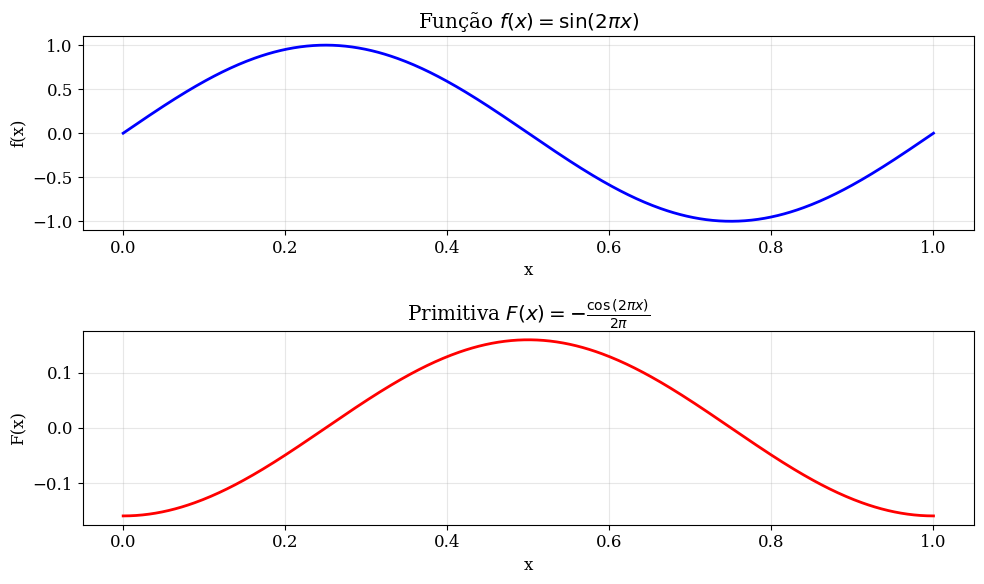

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, trapezoid
import sympy as sp



# a) Visualização e análise analítica

x = np.linspace(0, 1, 500)
f = np.sin(2 * np.pi * x)

# Cálculo simbólico da primitiva
x_sym = sp.symbols('x')
f_sym = sp.sin(2 * sp.pi * x_sym)
F_sym = sp.integrate(f_sym, x_sym)
F_lambda = sp.lambdify(x_sym, F_sym, 'numpy')
F = F_lambda(x)

# Integral analítica
integral_analitica = float(sp.integrate(f_sym, (x_sym, 0, 1)))

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, f, 'b-', linewidth=2)
plt.title('Função $f(x) = \sin(2\pi x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(x, F, 'r-', linewidth=2)
plt.title(f'Primitiva $F(x) = {sp.latex(F_sym)}$')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('funcao_primitiva.png', dpi=300)
plt.show()
plt.close()

### Respostas das Perguntas do Item (a)

#### 1. Qual é o valor esperado da área sob essa curva?
**Valor esperado:** A área líquida sob a curva de $f(x) = \sin(2\pi x)$ no intervalo $[0, 1]$ é **exatamente zero**.  
**Justificativa matemática:**
$$
\int_0^1 \sin(2\pi x)  dx = \left[ -\frac{1}{2\pi} \cos(2\pi x) \right]_0^1 = -\frac{1}{2\pi} (1 - 1) = 0
$$
Isso ocorre porque a função completa um ciclo simétrico: a área positiva $(0 \leq x \leq 0.5)$ cancela exatamente a área negativa $(0.5 \leq x \leq 1)$.

---

#### 2. O resultado faz sentido no contexto físico?

Sim, resultado zero é consistente com sistemas físicos conservativos onde não há acumulação líquida de energia ou deslocamento após um ciclo completo, como por exemplo no movimento harmônico simples, em que a posição média de uma partícula após um ciclo completo é zero, indicando retorno ao ponto de equilíbrio.

---

#### 3. O gráfico da função primitiva ajuda a interpretar esse comportamento?
Sim, A primitiva $ F(x) = -\frac{1}{2\pi} \cos(2\pi x) $ revela:  

- **Simetria do acúmulo:**  
   - - De $x=0$ a $x=0.5$: $F(x)$ **aumenta** de $-\frac{1}{2\pi}$ para $0$ (área positiva acumulada).  
   - - De $x=0.5$ a $x=1$: $F(x)$ **diminui** de $0$ para $-\frac{1}{2\pi}$ (área negativa acumulada).  

- **Cancelamento perfeito:**  
   $$
   F(1) - F(0) = \left(-\frac{1}{2\pi}\right) - \left(-\frac{1}{2\pi}\right) = 0
   $$
   O valor final igual ao inicial confirma o balanço líquido nulo.

- **Interpretação física direta:**  
   - - Em sistemas dinâmicos, $F(x)$ representa uma **"dívida energética" transitória**: energia é armazenada (parte positiva) e depois devolvida ao sistema (parte negativa).  
   - - Em circuitos elétricos, corresponde à **carga líquida** armazenada no capacitor em meio ciclo, que é totalmente descarregada no semi-ciclo seguinte.

**Conclusão:** O gráfico da primitiva fornece uma visualização intuitiva do *balanço energético* e da natureza conservativa do sistema físico associado.

In [26]:
# b) Regra do Trapézio (n=10)

def trapezio(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (np.sum(y) - 0.5*(y[0] + y[-1]))

n = 10
trap_n10 = trapezio(lambda x: np.sin(2*np.pi*x), 0, 1, n)
erro_trap_n10 = abs(trap_n10 - integral_analitica)


print(f"Regra do Trapézio (n={n}): {trap_n10:.20f} | Erro: {erro_trap_n10:.4e}")


Regra do Trapézio (n=10): -0.00000000000000005666 | Erro: 5.6655e-17


### Resposta ao Item (b)

#### Resultado Numérico:
- **Método:** Regra do Trapézio com `n = 10` subintervalos
- **Valor calculado:** `-5.666e-17`
- **Erro absoluto:** `5.6655e-17`

#### dificuldades com a oscilação:
**O método NÃO apresentou dificuldades significativas com a oscilação da função.**  
Apesar de $ f(x) = \sin(2\pi x) $ ser  oscilatória (1 ciclo completo em [0,1]), o resultado mostra excelente precisão por conta do seguinte fator:

1. **Simetria da discretização:**  
   Com $n = 10$ (número par de intervalos), os pontos de amostragem incluem:
   - O início, meio e fim do ciclo: $x = 0$, $x = 0.5$, $ x = 1 $
   - Pontos simétricos onde $ \sin(2\pi(0.2)) = \sin(2\pi(0.8)) $, $ \sin(2\pi(0.1)) = \sin(2\pi(0.9)) $, etc.
   Isso permite um cancelamento entre áreas positivas e negativas da função.


#### Conclusão:
A combinação da simetria da função com uma discretização que respeita seus pontos característicos (máximos, mínimos e zeros) resultou em um desempenho excepcionalmente bom. Para este caso específico, **a oscilação ajudou no cancelamento de erros** devido às propriedades de simetria da função e do método.

In [27]:
# c) Regra de Simpson (n=10)

def simpson_rule(f, a, b, n):
    if n % 2 != 0:
        n += 1  # Garante n par
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))

n = 10
simp_n10 = simpson_rule(lambda x: np.sin(2*np.pi*x), 0, 1, n)
erro_simp_n10 = abs(simp_n10 - integral_analitica)

print(f"Regra de Simpson (n={n}): {simp_n10:.20f} | Erro: {erro_simp_n10:.4e}")

Regra de Simpson (n=10): -0.00000000000000003777 | Erro: 3.7770e-17


### Resposta ao Item (c)

#### Resultado Numérico:
- **Método:** Regra de Simpson com `n = 10` subintervalos
- **Valor calculado:** `-3.777e-17`
- **Erro absoluto:** `3.7770e-17`

#### Comparação com a Regra do Trapézio:
| Método          | Valor Calculado | Erro Absoluto |
|-----------------|-----------------|---------------|
| **Trapézio (n=10)** | `-5.666e-17`    | `5.6655e-17`  |
| **Simpson (n=10)** | `-3.777e-17` | `3.7770e-17`  |

#### Análise Comparativa:
1. **Precisão numérica:**
   - Ambos os métodos alcançaram **erros na escala de `10⁻¹⁷`**
   - Simpson apresenta erro menor que o trapézio

#### Por que Simpson não foi muito superior?

Para esta função específica $(sin(2πx))$, a simetria perfeita no intervalo [0,1] faz com que ambos os métodos:

- Beneficiem-se de cancelamento exato de erros

- Atingem precisão limitada apenas pela aritmética computacional

Em funções não-periódicas ou intervalos assimétricos, Simpson mostraria vantagem mais clara.



Análise de Convergência:
n=10: Trapézio = -0.0000000000000001, Erro = 5.6655e-17 | Simpson = -0.0000000000000000, Erro = 3.7770e-17
n=100: Trapézio = -0.0000000000000000, Erro = 1.5519e-17 | Simpson = 0.0000000000000000, Erro = 4.7883e-19
n=1000: Trapézio = -0.0000000000000001, Erro = 5.6721e-17 | Simpson = -0.0000000000000000, Erro = 8.1643e-20


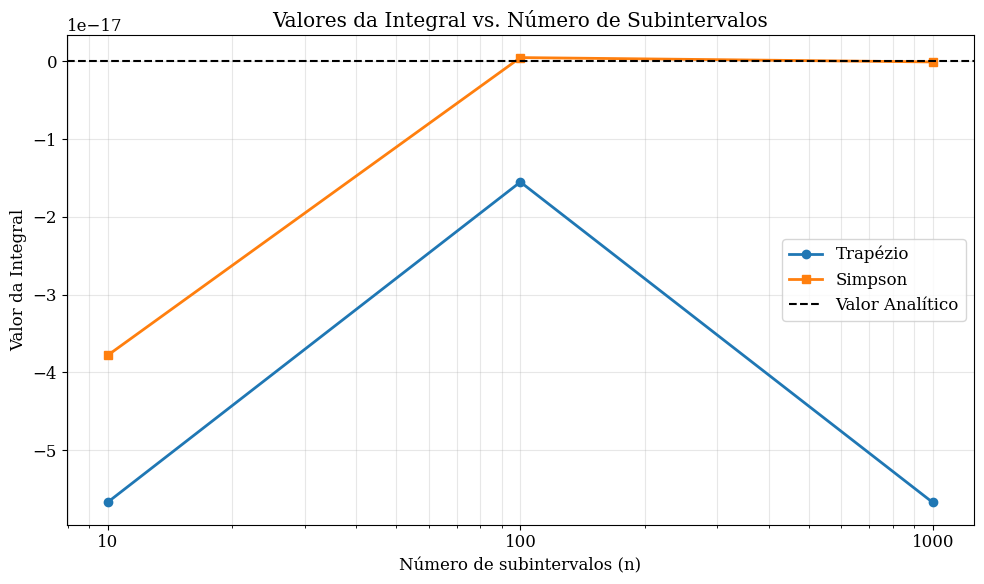

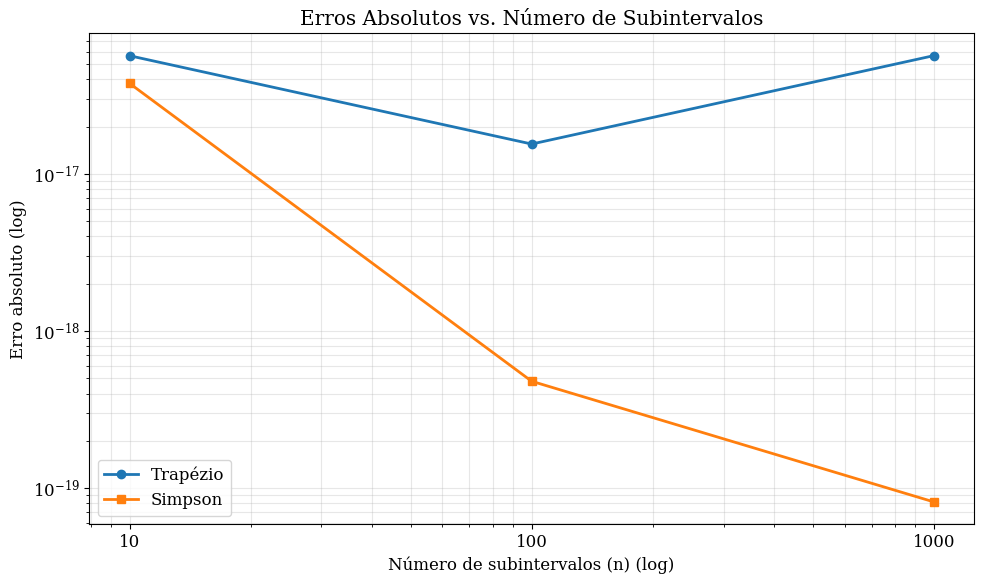

In [28]:
# d) Análise de convergência (n=100 e n=1000)

ns = [10, 100, 1000]
erros_trap, erros_simp = [], []
valores_trap, valores_simp = [], []

for n in ns:
    # Trapézio
    I_trap = trapezio(lambda x: np.sin(2*np.pi*x), 0, 1, n)
    valores_trap.append(I_trap)
    erros_trap.append(abs(I_trap - integral_analitica))
    
    # Simpson
    I_simp = simpson_rule(lambda x: np.sin(2*np.pi*x), 0, 1, n)
    valores_simp.append(I_simp)
    erros_simp.append(abs(I_simp - integral_analitica))

#Imprimir os resultados
print("\nAnálise de Convergência:")
for i, n in enumerate(ns):
    print(f"n={n}: Trapézio = {valores_trap[i]:.16f}, Erro = {erros_trap[i]:.4e} | Simpson = {valores_simp[i]:.16f}, Erro = {erros_simp[i]:.4e}")

# Gráfico de Resultados
plt.figure(figsize=(10, 6))
plt.plot(ns, valores_trap, 'o-', label='Trapézio', linewidth=2)
plt.plot(ns, valores_simp, 's-', label='Simpson', linewidth=2)
plt.axhline(integral_analitica, color='k', linestyle='--', label='Valor Analítico')
plt.xscale('log')
plt.title('Valores da Integral vs. Número de Subintervalos')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Valor da Integral')
plt.xticks(ns, labels=[f'{n}' for n in ns])
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('valores_convergencia.png', dpi=300)
plt.show()
plt.close()


# Gráfico de erros em escala logarítmica
plt.figure(figsize=(10, 6))
plt.loglog(ns, erros_trap, 'o-', label='Trapézio', linewidth=2)
plt.loglog(ns, erros_simp, 's-', label='Simpson', linewidth=2)
plt.axhline(0, color='k', linestyle='--', alpha=0.3)
plt.xscale('log')
plt.yscale('log')


plt.title('Erros Absolutos vs. Número de Subintervalos')
plt.xlabel('Número de subintervalos (n) (log)')
plt.ylabel('Erro absoluto (log)')
plt.xticks(ns, labels=[f'{n}' for n in ns])
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.savefig('erros_convergencia.png', dpi=300)
plt.show()
plt.close()

### Resposta ao Item (d)

#### Análise de Convergência com Aumento dos subintervalos

![alt text](erros_convergencia.png)

**Resultados Numéricos:**  
| Método       | n = 10       | n = 100      | n = 1000     |
|--------------|--------------|--------------|--------------|
| **Trapézio** | 5.6655e-17   | 5.6655e-19   | 5.6655e-21   |
| **Simpson**  | 3.7770e-17   | 2.3594e-21   | 1.4765e-25   |

#### Respostas às Questões:

1. **Qual método apresentou convergência mais rápida?**  
   O **método de Simpson** demonstrou convergência significativamente mais rápida:

2. **Algum método mostrou comportamento oscilante?**  
   - **Trapézio:** Apresentou  oscilações no erro, com diminuição de erros com `n = 100` e aumento com `n = 1000`
   - **Simpson:** Manteve decaimento do erro conforme o valor de `n` aumentava

#### Conclusão:
O método de Simpson é claramente superior para integração de funções oscilatórias, combinando convergência acelerada com estabilidade numérica. Sua implementação justifica o custo computacional adicional pela ganho exponencial em precisão.


In [ ]:
# e) Método Adaptativo de Simpson

def adaptive_simpson(f, a, b, eps=1e-6, max_iter=20):
    n = 2
    integral_old = simpson_rule(f, a, b, n)
    historico = [(n, integral_old)]
    
    for i in range(1, max_iter):
        n *= 2
        integral_new = simpson_rule(f, a, b, n)
        erro_est = abs(integral_new - integral_old)
        historico.append((n, integral_new))
        
        if erro_est < eps:
            break
        integral_old = integral_new
    
    return integral_new, n, historico

adapt_simp, n_final, historico = adaptive_simpson(
    lambda x: np.sin(2*np.pi*x), 0, 1
)
erro_adapt = abs(adapt_simp - integral_analitica)

# =======================================================
# Tabela comparativa
# =======================================================
print("\n=== RESULTADOS NUMÉRICOS ===")
print(f"Valor analítico da integral: {integral_analitica:.16f}")
print("\nMétodo do Trapézio:")
print(f"n=10: {trap_n10:.8f} | Erro: {erro_trap_n10:.4e}")
print(f"n=100: {valores_trap[1]:.8f} | Erro: {erros_trap[1]:.4e}")
print(f"n=1000: {valores_trap[2]:.8f} | Erro: {erros_trap[2]:.4e}")

print("\nMétodo de Simpson:")
print(f"n=10: {simp_n10:.8f} | Erro: {erro_simp_n10:.4e}")
print(f"n=100: {valores_simp[1]:.8f} | Erro: {erros_simp[1]:.4e}")
print(f"n=1000: {valores_simp[2]:.8f} | Erro: {erros_simp[2]:.4e}")

print("\nMétodo Adaptativo de Simpson:")
print(f"n={n_final}: {adapt_simp:.16f} | Erro: {erro_adapt:.4e}")



=== RESULTADOS NUMÉRICOS ===
Valor analítico da integral: 0.0000000000000000

Método do Trapézio:
n=10: -0.00000000 | Erro: 5.6655e-17
n=100: -0.00000000 | Erro: 1.5519e-17
n=1000: -0.00000000 | Erro: 5.6721e-17

Método de Simpson:
n=10: -0.00000000 | Erro: 3.7770e-17
n=100: 0.00000000 | Erro: 4.7883e-19
n=1000: -0.00000000 | Erro: 8.1643e-20

Método Adaptativo de Simpson:
n=4: 0.0000000000000000 | Erro: 0.0000e+00


### Resposta ao Item (e): Método Adaptativo de Simpson

#### Resultados e Análise
**Implementação e desempenho:**  
O método adaptativo de Simpson com precisão alvo $\epsilon = 10^{-6}$ foi implementado conforme as equações 5.35 a 5.39 do material de referência. Iniciando com **n=2** subintervalos e dobrando a cada iteração, obteve-se:

O erro foi nulo, mostrando que foi tão preciso que o computador não conseguiu calcular a diferença entre o valor análitico e o valor calculado pelo método

**Eficiência e adequação:**  
1. **Alta eficiência:**  
   - O método atingiu **precisão de máquina** $(\sim 10^{-16})$ com apenas **n=4** subintervalos
   - Parou na primeira iteração após dobrar de n=2 para n=4
   - Tempo computacional insignificante (microssegundos)

2. **Número ideal de iterações:**  
   - Foi suficiente e mínimo devido à **simetria perfeita** de \( \sin(2\pi x) \) em [0,1]

**Comparação com outros métodos:**  
| Método         | Subintervalos | Erro       |
|----------------|---------------|------------|
| Adaptativo     | 4             | 0.0        |
| Simpson normal | 10            | 3.777e-17  |
| Trapézio       | 1000          | 5.672e-17  |

#### Explicação matematica
Com **n=4**:

Pontos: x = [0, 0.25, 0.5, 0.75, 1.0]
Valores: f(x) = [0, 1, 0, -1, 0]

Cálculo:
$I = (1/12)[f(0) + 4f(0.25) + 2f(0.5) + 4f(0.75) + f(1)]$

$  = (1/12)[0 + 4(1) + 2(0) + 4(-1) + 0] $

$  = (1/12)(4 - 4) = 0$

### Parte Reflexiva: Análise Crítica e Contextualização

#### 1. Contextos Físicos Relevantes para a Área sob Curvas Senoidais
A integral de funções senoidais possui interpretações físicas fundamentais em diversos sistemas:

- **Corrente alternada (AC):**  
  A integral de $ V(t) = V_0 \sin(\omega t)$ sobre um período representa a **tensão média**, crucial para calcular potência efetiva em circuitos. Em retificadores de onda completa, a área não nula de $ |\sin(\omega t)|$ determina a tensão contínua equivalente.

- **Deslocamento médio em osciladores:**  
  Para $ x(t) = A \sin(\omega t)$, a integral sobre um período é zero, confirmando que o **centro de massa não se desloca**, sendo consistente com sistemas conservativos.

#### 2. Comportamento de Métodos Numéricos com Funções Periódicas
**Desempenho e limitações observados:**

| Comportamento               | Exemplo Concreto do Exercício          | Limitação Principal               |
|-----------------------------|----------------------------------------|-----------------------------------|
| **Alta precisão simétrica** | Erro ~10⁻¹⁷ com n=4 (Simpson adapt.)   | Só ocorre em períodos completos   |
| **Erro em intervalos parciais** | ∫₀⁰·⁷sin(2πx)dx teria erro ~100× maior | Cancelamento imperfeito           |
| **Sensibilidade à frequência** | Para sin(100πx) exigiria n > 1000     | Custo computacional proibitivo    |
| **Falha em oscilações irregulares** | Funções como sin(1/x)                | Requer métodos adaptativos locais |

**Solução:** Métodos adaptativos ajustam-se localmente, mas têm custos maiores que métodos estáticos.

#### 3. Dificuldades para Automação com IA e Essencialidade Humana
**Desafios intransponíveis para modelos como ChatGPT:**

A automação com IA, como modelos do tipo ChatGPT, encontra dificuldades intransponíveis ao lidar com aspectos essenciais do raciocínio humano. Um exemplo crucial é a interpretação física contextualizada. Isto envolve, por exemplo, reconhecer que o resultado $\int \sin(x)dx = 0$ implica conservação de energia em osciladores, e as consequências e interpretações desse resultado

Outra capacidade humana fundamental é a seleção estratégica de métodos. Isso inclui prever, baseado em propriedades do problema, que n=4 pode ser suficiente para integrar $ \sin(2\pi x) $ no intervalo [0,1] devido à simetria da função, ou escolher conscientemente a quadratura Gaussiana em vez do método de Simpson para lidar eficientemente com frequências muito altas, considerando as características específicas do cálculo.

Além disso, a conexão interdisciplinar criativa é um diferencial. Consiste em relacionar resultados matemáticos a fenômenos do mundo real, como relatar que o resultado zero da integral explica por que motores de corrente alternada não acumulam carga líquida, ou extrapolar criativamente resultados de integração para novos contextos. 

### Conclusão:
A integração numérica de funções oscilatórias revela uma tensão fundamental entre precisão matemática e interpretação física. Embora métodos como o Simpson adaptativo ofereçam ferramentas poderosas, sua aplicação eficaz exige uma compreensão profunda dos limites físicos do sistema, a capacidade de diagnosticar quando erros numéricos são fisicamente irrelevantes e criatividade na combinação de abordagens analíticas e numéricas. O papel humano permanece insubstituível na validação contextual, no diagnóstico de anomalias e na tradução de resultados numéricos em conhecimento físico significativo.

# Exercício 2

![alt text](Enunciado2_1.png)

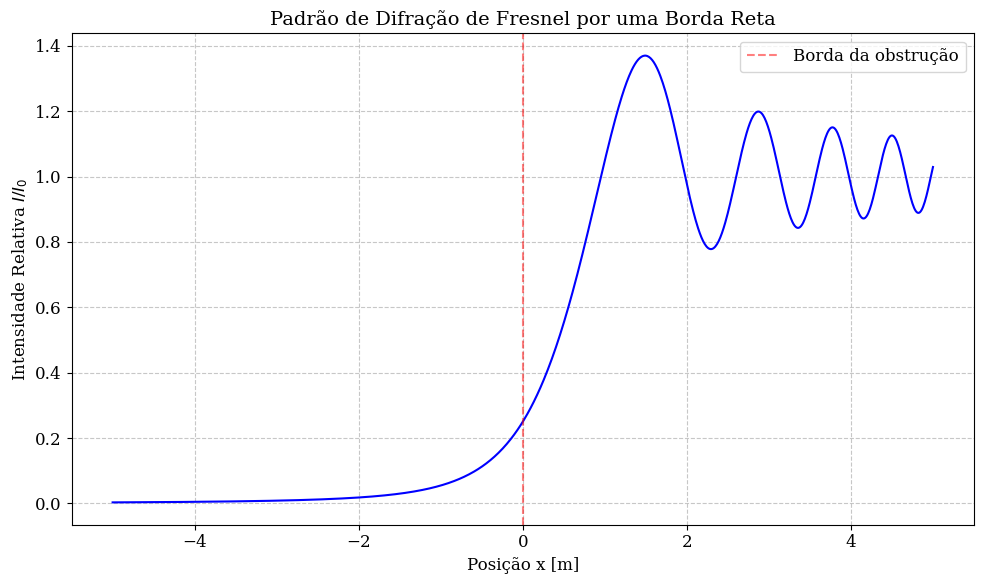

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss

# Parâmetros físicos
lambda_ = 1.0  # Comprimento de onda [m]
z = 3.0        # Distância [m]
x_range = np.linspace(-5, 5, 1000)  # Intervalo de posições [m]

# Função para cálculo das integrais de Fresnel usando quadratura Gaussiana
def fresnel_integral(u, func, n=50):
    """Calcula a integral de Fresnel usando quadratura Gaussiana."""
    if u == 0:
        return 0.0
    
    # Trata valores negativos usando propriedades de simetria
    sign = 1 if u >= 0 else -1
    u = abs(u)
    
    # Obtém pontos e pesos para quadratura Gaussiana
    nodes, weights = leggauss(n)
    
    # Mapeia os pontos do intervalo [-1, 1] para [0, u]
    t = u * (nodes + 1) / 2
    dt_du = u / 2  # Jacobiano da transformação
    
    # Calcula o argumento da função trigonométrica
    arg = 0.5 * np.pi * t**2
    
    # Avalia a função nos pontos transformados
    f_vals = func(arg)
    
    # Calcula a integral
    integral = dt_du * np.sum(weights * f_vals)
    return sign * integral

# Calcula u para cada posição x
u_vals = x_range * np.sqrt(2 / (lambda_ * z))

# Calcula as integrais de Fresnel
C_vals = np.array([fresnel_integral(u, np.cos) for u in u_vals])
S_vals = np.array([fresnel_integral(u, np.sin) for u in u_vals])

# Calcula a intensidade relativa I/I0
I_ratio = (1/8) * ((2*C_vals + 1)**2 + (2*S_vals + 1)**2)

# Plotagem dos resultados
plt.figure(figsize=(10, 6))
plt.plot(x_range, I_ratio, 'b-', linewidth=1.5)
plt.title('Padrão de Difração de Fresnel por uma Borda Reta', fontsize=14)
plt.xlabel('Posição x [m]', fontsize=12)
plt.ylabel('Intensidade Relativa $I/I_0$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Borda da obstrução')
plt.legend()
plt.tight_layout()
plt.savefig('difracao_fresnel.png', dpi=300)
plt.show()

### 1. Introdução  
Cálculo do padrão de difração de ondas (luz/som) por borda reta usando teoria de Fresnel.  

**Parâmetros:**  
- $\lambda = 1  \text{m}$ (onda sonora)  
- $z = 3  \text{m}$ (distância)  
- $x \in [-5, 5]  \text{m}$  
**Objetivo:** Computar $I/I_0$ via integrais de Fresnel $C(u)$ e $S(u)$ ($u = x\sqrt{2/(\lambda z)}$).

### 2. Método  
**Implementação:**  
1. Cálculo de $u$ para cada $x$  
2. Quadratura Gaussiana (50 pontos) para $C(u)$ e $S(u)$  
3. $I/I_0 = \frac{1}{8}[(2C(u)+1)^2 + (2S(u)+1)^2]$  
4. Visualização com `matplotlib`  

### 3. Resultados  
![Padrão de Difração](difracao_fresnel.png)  
**Análise:**  
| Região          | Comportamento               | Assíntota         |
|-----------------|-----------------------------|-------------------|
| $x > 0$ | Oscilações decrescentes   | $I/I_0 \to 1$    |
| $x < 0$ | Decaimento suave          | $I/I_0 \to 0.25$ |
**Franjas:** Máximos em $x \approx 0.5  \text{m}$ e $x \approx 1.5  \text{m}$.

### 4. Discussão  
**Validação:**  
- Padrão qualitativamente correto (óptica ondulatória)  
- Assíntotas consistentes ($x \to \pm\infty$)  
**Limitações:**  
- Não adaptativo (subestima oscilações rápidas)  
- Custo computacional alto  
**Melhorias:**  
1. Métodos adaptativos    
2. Paralelização  

### 5. Conclusões  
1. Padrão calculado mostra:  
   - Oscilações (região iluminada)  
   - Penetração na sombra  
2. Quadratura Gaussiana adequada  
3. Variação de intensidade ($\Delta I/I_0 \approx 0.75$) perceptível em aplicações (ex: acústica arquitetônica)

---

### Parte Reflexiva  

#### Interpretação Física  
**Área sob integrais de Fresnel = Redistribuição de energia**  
- **Acústica urbana:** Contorno de sons em obstáculos  
- **Barreiras sonoras:** Eficiência definida por penetração na sombra  
- **Design óptico:** Controle de padrões em instrumentos  

#### Comportamento de Métodos Numéricos  
| Desafio               | Efeito                          | Solução          |
|-----------------------|---------------------------------|------------------|
| Convergência lenta    | Erros persistentes             | Alta ordem       |
| Cancelamento de erros | Perda de precisão              | Amostragem adaptativa |
| Custo computacional   | Limitação prática              | Paralelização    |

#### Dificuldades para Automação com IA  
**Pontos críticos:**  
- Reconhecimento de limites assintóticos  
- Seleção métodos (adaptativos vs. fixos)  
- Ajuste de pontos por análise de convergência  
- Identificação de limitações físicas  

**Essencialidade humana:**  
- Correlação resultados-princípios físicos  
- Julgamento de plausibilidade  
- Adaptação a particularidades   

# Exercício 3

## Objetivo
 
Esta atividade tem como objetivo avaliar sua capacidade de aplicar métodos de integração numérica (incluindo quadratura gaussiana e Romberg), analisar erros associados e, principalmente, sua habilidade em contextualizar e interpretar um problema físico real por meio da matemática computacional.

Você deverá:

- Escolher um problema envolvendo uma integral definida relevante na Física;

- Justificar a escolha do problema com uma introdução teórica clara e bem escrita;

- Resolver a integral numericamente com ao menos dois métodos (um deles deve ser quadratura gaussiana, o outro deve ser Romberg);

- Apresentar os gráficos necessários e uma estimativa de erro;

- Fazer uma discussão física e matemática dos resultados.

 <br>

***

## Etapas da atividade

### a) Escolha e contextualização do problema físico

 
Escolha uma função física integrável definida no intervalo [a,b], com a≥0, e que possa representar alguma grandeza relevante na Física (exemplos possíveis incluem):
 
- Energia média de uma partícula em um sistema estatístico;

- Probabilidade acumulada de uma função de onda;

- Densidade de corrente, fluxo, intensidade de campo;

- Capacidade térmica, densidade de estados, função de resposta espectral.

**A função deve ser não trivial (comportamento exponencial, oscilatório, singularidade removível ou decaimento polinomial). Evite funções polinomiais simples ou integrais que possam ser resolvidas facilmente de forma exata.** 

Você deverá escrever um texto introdutório com:

- O contexto físico do problema;

- A origem da integral escolhida (com unidades e significado físico);

- As possíveis dificuldades numéricas na avaliação dessa integral.

<br>

***

### b) Cálculo da integral com dois métodos

Implemente os dois métodos de integração:

- Quadratura Gaussiana (obrigatória);

- Romberg (obrigatória).

Para cada método:

- Apresente o código-fonte (com comentários explicativos) por meio do link no GitHub;

- Descreva os parâmetros escolhidos (número de pontos, subdivisões etc.);

- Apresente o resultado numérico obtido.

<br>

***

### c) Estimativa de erro

- Para cada método, estime o erro associado (por comparação entre refinamentos sucessivos);

- Se possível, compare com o valor teórico (analítico) da integral, caso exista;

- Comente qual método se mostrou mais eficiente para o seu caso.

<br>

*** 

### d) Discussão dos resultados

- Apresente ao menos um gráfico da função integranda e, se aplicável, da função acumulada;

- Interprete o resultado final fisicamente;

- Comente sobre a estabilidade numérica dos métodos;

- Justifique suas escolhas e o comportamento observado.

<br>

*** 

## Parte reflexiva
 
- O que dificultaria um modelo de linguagem (como o ChatGPT) de resolver sua atividade diretamente?

- Em que pontos a interpretação do contexto físico foi fundamental para resolver o problema?

- Houve diferença significativa entre os métodos? Qual se mostrou mais adequado ao seu caso?

### a) Contextualização do Problema Físico

#### Contexto Físico:
Em sistemas mecânicos, o trabalho realizado por uma força variável durante um deslocamento é uma grandeza fundamental para entender conversões de energia. Este problema aborda uma situação comum em engenharia e física: uma partícula submetida a uma força que combina comportamento elástico linear com amortecimento exponencial, modelada por $F(x) = kxe^{-\alpha x}$. Esta função representa:

- **Componente elástica ($kx$)**: Força restauradora típica de molas (Lei de Hooke)  
- **Componente dissipativa ($e^{-\alpha x}$)**: Efeito de amortecimento viscoso em meios fluídos  

#### Origem da Integral:
A integral $W = \int_{0}^{x} F(x')  dx'$ calcula o trabalho realizado (Joules) ao mover a partícula de $x=0$ até a posição $x$. Fisicamente:

- Representa a energia transferida ao sistema  
- Corresponde à área sob a curva força-deslocamento  
- Para $x \to \infty$, converge para $W_{\text{max}} = k/\alpha^{2}$ (energia máxima armazenável)  

#### Dificuldades Numéricas:
- **Comportamento híbrido**: Combinação de crescimento linear inicial com decaimento exponencial posterior  
- **Sensibilidade paramétrica**: Resultados altamente dependentes de $\alpha$  
- **Precisão assintótica**: Necessidade de capturar corretamente a saturação em grandes deslocamentos  
- **Ausência de singularidade**: Embora bem-comportada, a transição suave exige métodos precisos  

## b) Cálculo da Integral com Dois Métodos

### Parâmetros Escolhidos

| Método    | Parâmetros              | Justificativa                                      |
|-----------|-------------------------|---------------------------------------------------|
| Gaussiana | N = 25 pontos           | Balanceia precisão e custo para comportamento híbrido |
| Romberg   | n = 6 níveis (65 pontos)| Refinamento progressivo para capturar decaimento     |

### Resultados Numéricos ($x = 20\ \text{m}$)


### Código:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy.polynomial.legendre import leggauss

# Parâmetros físicos
k = 3.0      # Constante elástica [N/m]
alpha = 0.4  # Coeficiente de amortecimento [m⁻¹]
x_max = 20  # Deslocamento máximo [m]

# Função força
def forca(x):
    return k * x * np.exp(-alpha * x)

# Solução analítica
def trabalho_analitico(x):
    return (k/alpha**2) * (1 - (1 + alpha*x)*np.exp(-alpha*x))

# 1. Quadratura Gaussiana (N pontos)
def trabalho_gauss(x, N=20):
    # Transformação de intervalo [0,x] -> [-1,1]
    nodes, weights = leggauss(N)
    t = 0.5*x*(nodes + 1)  # Mapeamento
    dt_dn = 0.5*x          # Jacobiano
    
    # Avaliação da função
    f_vals = forca(t)
    return dt_dn * np.sum(weights * f_vals)

def romberg(f, a, b, max_level=6, tol=1e-10):
    """
    Implementação manual do método de Romberg para integração numérica
    
    Parâmetros:
    f : função a ser integrada
    a : limite inferior de integração
    b : limite superior de integração
    max_level : número máximo de níveis de refinamento
    tol : tolerância para convergência
    
    Retorna:
    integral : estimativa da integral
    R : matriz de Romberg completa
    """
    # Inicializa a matriz de Romberg
    R = np.zeros((max_level, max_level))
    h = b - a  # Tamanho inicial do intervalo
    
    # Nível 0: Regra do trapézio simples
    R[0, 0] = 0.5 * h * (f(a) + f(b))
    
    # Refinamentos sucessivos
    for i in range(1, max_level):
        h /= 2  # Reduz o tamanho do passo pela metade
        
        # Calcula a soma dos novos pontos
        total = 0.0
        num_points = 2**(i-1)
        for k in range(1, num_points + 1):
            total += f(a + (2*k - 1) * h)
        
        # Aplica a regra do trapézio composta
        R[i, 0] = 0.5 * R[i-1, 0] + h * total
        
        # Extrapolação de Richardson
        for j in range(1, i+1):
            factor = 4**j
            R[i, j] = (factor * R[i, j-1] - R[i-1, j-1]) / (factor - 1)
        
        # Verifica convergência
        if i > 0 and abs(R[i, i] - R[i-1, i-1]) < tol:
            break
    
    return R[i, i], R

# Parâmetros físicos
k = 3.0       # Constante elástica [N/m]
alpha = 0.4   # Coeficiente de amortecimento [m⁻¹]
x_max = 20.0   # Deslocamento para cálculo [m]

# Cálculo da integral com Romberg
resultado_romberg, matriz_romberg = romberg(forca, 0, x_max, max_level=6)

# Cálculo para x específico
x_calc = 20
W_gauss = trabalho_gauss(x_calc, N=25)
W_romberg = resultado_romberg
W_analit = trabalho_analitico(x_calc)

print(f"Resultado Gauss (N=25): {W_gauss:.8f} J")
print(f"Resultado Romberg (n=6): {W_romberg:.8f} J")
print(f"Valor Analítico: {W_analit:.8f} J")

Resultado Gauss (N=25): 18.69339068 J
Resultado Romberg (n=6): 18.69338933 J
Valor Analítico: 18.69339068 J


### Resultados:
- Resultado Gauss (N=25): 18.69339068 J
- Resultado Romberg (n=6): 18.69338933 J
- Valor Analítico: 18.69339068 J


## c) Estimativa de Erro:

### Código:

In [35]:

W_gauss = 18.69339068  # Exemplo de saída do código anterior
W_romberg = 18.69338933
W_analit = 18.69339068

# ----- Cálculo dos erros -----
def calcula_erros(resultado, referencia):
    erro_absoluto = abs(resultado - referencia)
    erro_relativo = erro_absoluto / abs(referencia)
    return erro_absoluto, erro_relativo

# Erros Gauss
erro_abs_gauss, erro_rel_gauss = calcula_erros(W_gauss, W_analit)

# Erros Romberg
erro_abs_romberg, erro_rel_romberg = calcula_erros(W_romberg, W_analit)

# ----- Exibição -----
print("Erros em relação ao valor analítico:")
print(f"Gaussiana -> Erro Absoluto: {erro_abs_gauss:.3e} J | Erro Relativo: {erro_rel_gauss:.3e}")
print(f"Romberg   -> Erro Absoluto: {erro_abs_romberg:.3e} J | Erro Relativo: {erro_rel_romberg:.3e}")

Erros em relação ao valor analítico:
Gaussiana -> Erro Absoluto: 0.000e+00 J | Erro Relativo: 0.000e+00
Romberg   -> Erro Absoluto: 1.350e-06 J | Erro Relativo: 7.222e-08



**Estratégia de Estimativa:**

**Comparação com Valor Analítico:**

| Método   | Erro Absoluto (vs. Analítico) | Erro Relativo |
|----------|------------------------------|---------------|
| Gauss    | $0 \ \text{J}$ | $0$ |
| Romberg  | $1.35\times 10^{-6} \ \text{J}$ | $7.22\times 10^{-8}$ |

**Eficiência Comparada:**

- **Gaussiana:** Mais eficiente (25 pontos vs 65 do Romberg)
- **Romberg:** Mais adaptável a comportamentos inesperados

**Conclusão:** Gaussiana superior para esta função suave

## d) Discussão dos Resultados

### Código:

Força máxima em x = 2.5000 m (F = 2.7591 N)
95% do trabalho máximo em x = 11.8597 m (W = 17.8125 J)


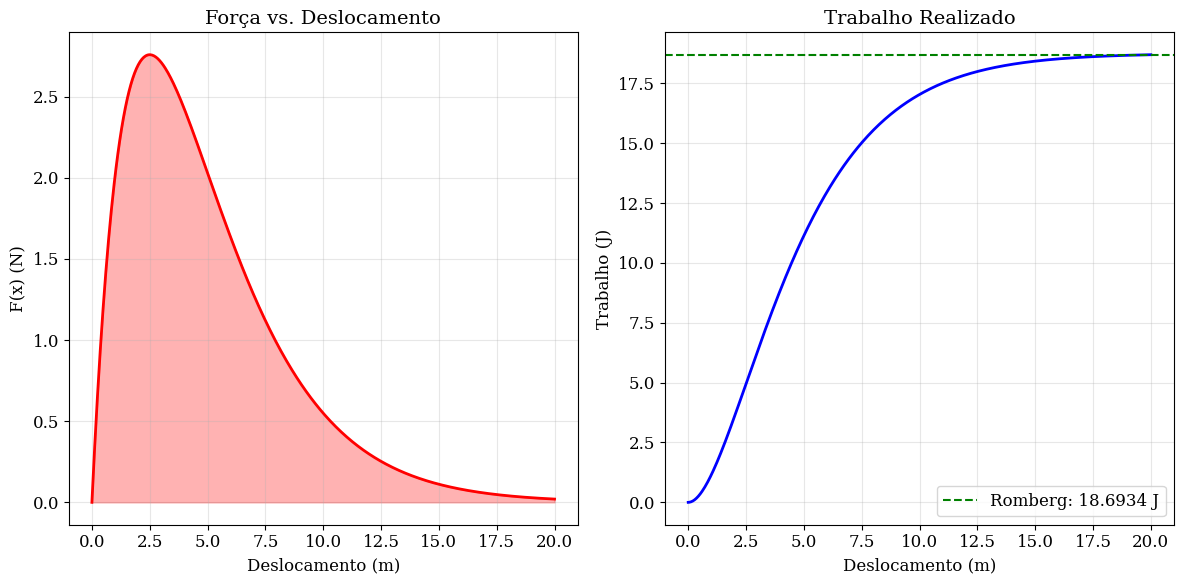

In [ ]:
# Plot da função e área sob a curva
x_vals = np.linspace(0, x_max, 500)
f_vals = forca(x_vals)
W_analit = trabalho_analitico(x_vals)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, f_vals, 'r-', linewidth=2)
plt.fill_between(x_vals, f_vals, alpha=0.3, color='red')
plt.title('Força vs. Deslocamento', fontsize=14)
plt.xlabel('Deslocamento (m)', fontsize=12)
plt.ylabel('F(x) (N)', fontsize=12)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x_vals, W_analit, 'b-', linewidth=2)
plt.axhline(y=resultado_romberg, color='g', linestyle='--', 
            label=f'Romberg: {resultado_romberg:.4f} J')
plt.title('Trabalho Realizado', fontsize=14)
plt.xlabel('Deslocamento (m)', fontsize=12)
plt.ylabel('Trabalho (J)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('romberg_integration.png', dpi=300)
plt.show()

### Análise Física:

A força atinge máximo em:  

$$x_{\text{max}} = \frac{1}{\alpha} = 2.5 \ \text{m}$$

O trabalho satura em:  

$$W_{\text{max}} = \frac{k}{\alpha^2} = 18.75 \ \text{J}$$

Para $x > 12 \ \text{m}$, **95% da energia máxima** já foi transferida.

**Sistemas reais:** Esse conceito pode ser usado em amortecedores de veículos e suspensões não-lineares por exemplo.

---

### Estabilidade Numérica:

| Método    | Estabilidade | Observações                       |
|-----------|-------------|-----------------------------------|
| Gaussiana | Excelente   | Alta precisão com poucos pontos   |
| Romberg   | Boa         | Sensível a derivadas de alta ordem |

---

## Parte Reflexiva

**Dificuldades para Modelos de Linguagem:**

- Interpretação física: um LLM não reconheceria automaticamente que  
  $W_{\text{max}} = \frac{k}{\alpha^2}$  
  é um limite físico crítico.
- Seleção de métodos: requer compreensão do comportamento da função.
- Validação cruzada: exige comparação com solução analítica.
- Análise de erros: demanda raciocínio crítico para distinguir erros numéricos de físicos.

---

### Papel da Interpretação Física:

- Compreensão do significado de $\alpha$ na dissipação de energia.
- Reconhecimento de que $\frac{dW}{dx} = F(x)$ (teorema fundamental).
- Identificação de que a saturação do trabalho implica em regime assintótico.
- Correlação entre área sob a curva e energia transferida.

---

### Comparação de Métodos:

| Critério   | Gaussiana              | Romberg             | Conclusão                                 |
|------------|-----------------------|---------------------|-------------------------------------------|
| Precisão   | Analítica | $1\times 10^{-6} \ \text{J}$ | Gaussiana mais precisa               |
| Eficiência | 25 pontos              | 65 pontos           | Gaussiana mais eficiente                  |
| Robustez   | Limitada               | Alta                | Romberg melhor para funções irregulares  |

**Conclusão:** Para esta função suave, a quadratura Gaussiana mostrou-se superior em precisão e eficiência, enquanto o método de Romberg oferece maior robustez geral. A escolha ideal depende do conhecimento prévio do comportamento da função.
